<a href="https://colab.research.google.com/github/DharaVivek/NeuroNexus/blob/main/task2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 1 - MOVIE GENRE CLASSIFICATION

Create a machine learning model that can predict the genre of a movie based on its plot summary or
other textual information. You can use techniques like TF-IDF or word embeddings with classifiers such
as Naive Bayes, Logistic Regression, or Support Vector Machines.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#load train data
train_path = r"/content/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
train_data

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
30434,Taking Back Oak Lawn (2016),documentary,The ever-changing story of a series of more t...
30435,On a raison de se révolter (1974),documentary,Tourné lors de la grčve chez Goodyear ŕ Jolie...
30436,TNB (2013),drama,"The action takes us on a disturbing, high-ene..."
30437,"""Marjolein en het geheim van het slaapzand"" (...",family,Marjolein's grandmother has a secret. Years b...


In [ ]:
print(train_data.describe())

                                 Title    Genre  \
count                            30438    30438   
unique                           30438       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1     7629   

                                              Description  
count                                               30438  
unique                                              30385  
top      Grammy - music award of the American academy ...  
freq                                                    8  


In [ ]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30438 entries, 1 to 30438
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        30438 non-null  object
 1   Genre        30438 non-null  object
 2   Description  30438 non-null  object
dtypes: object(3)
memory usage: 951.2+ KB
None


In [ ]:
print(train_data.isnull().sum())

Title          0
Genre          0
Description    0
dtype: int64


In [ ]:
#load test data
test_path=r"/content/test_data.txt"
test_data=pd.read_csv(test_path,sep=':::',names=['Title', 'Genre', 'Description'],engine='python')
test_data.head()

,Title,Genre,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


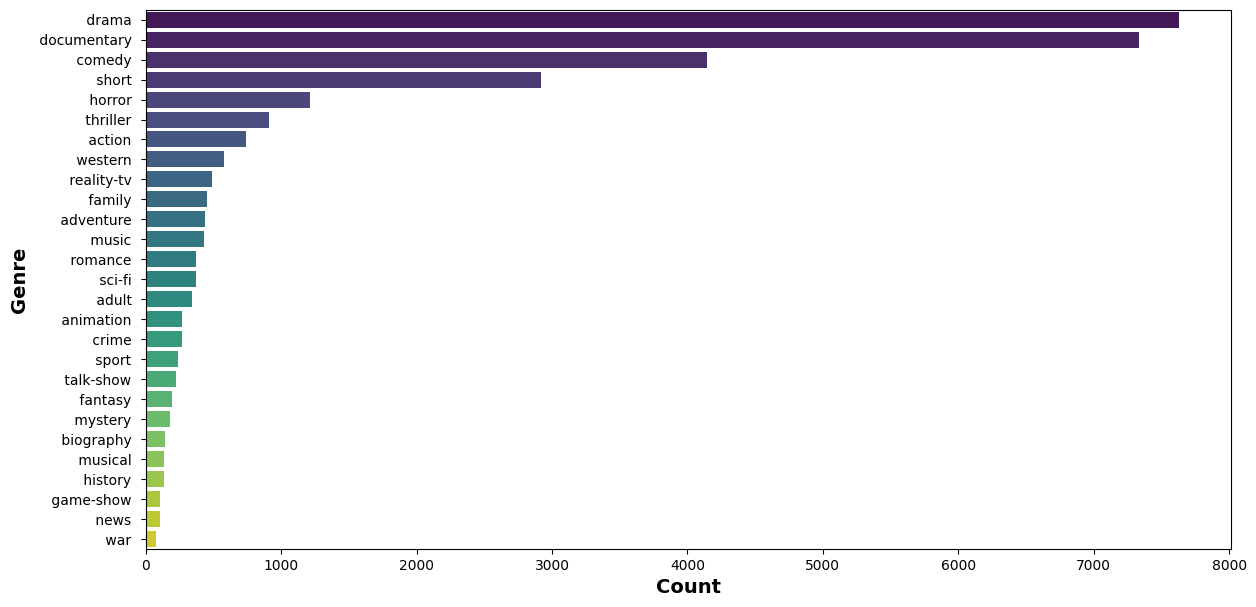

In [ ]:
#Plotting the distribution of geplt.figure(figsize=(14, 7))
plt.figure(figsize=(14, 7))
sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')
plt.show()

In [ ]:
print(train_data['Genre'].value_counts())


 drama           7629
 documentary     7337
 comedy          4142
 short           2918
 horror          1211
 thriller         914
 action           738
 western          581
 reality-tv       493
 family           450
 adventure        441
 music            429
 romance          370
 sci-fi           370
 adult            339
 animation        272
 crime            270
 sport            239
 talk-show        222
 fantasy          191
 mystery          179
 biography        141
 musical          138
 history          133
 game-show        108
 news             106
 war               77
Name: Genre, dtype: int64


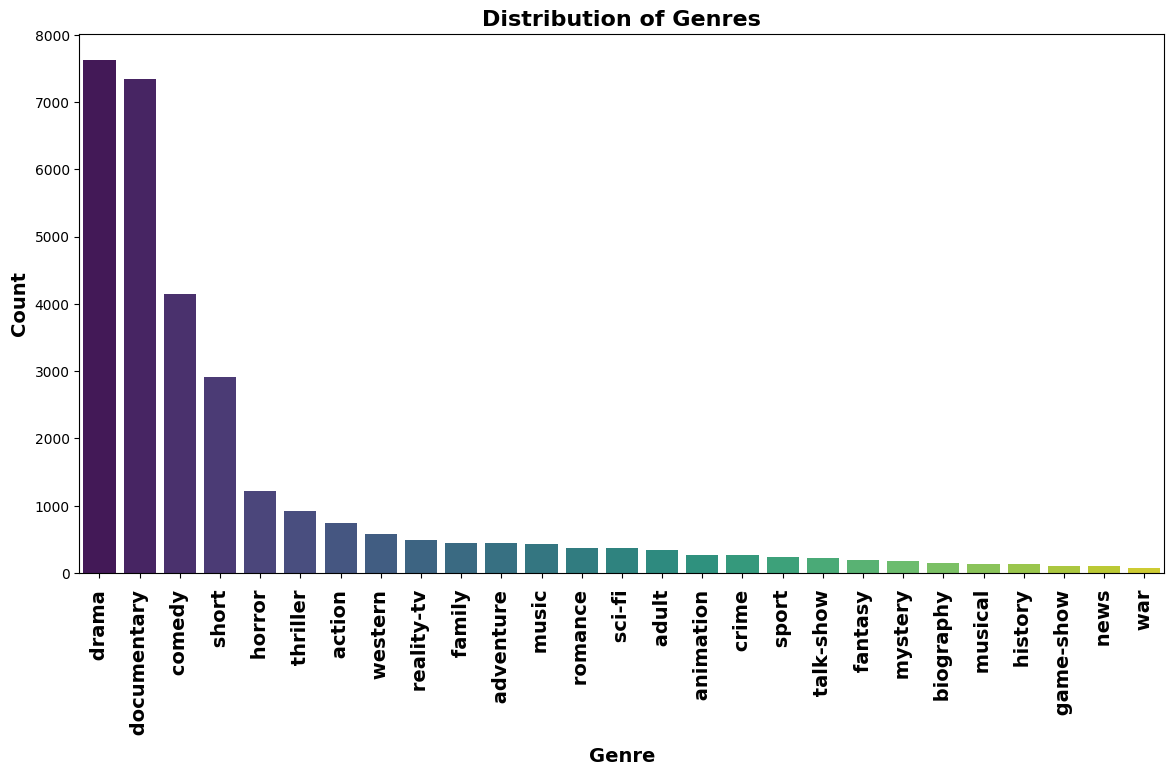

In [ ]:
# Plot the distribution of genres using a bar plot
plt.figure(figsize=(14, 7))
counts = train_data['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [ ]:
# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('punkt')
train_data['Text_cleaning']=train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


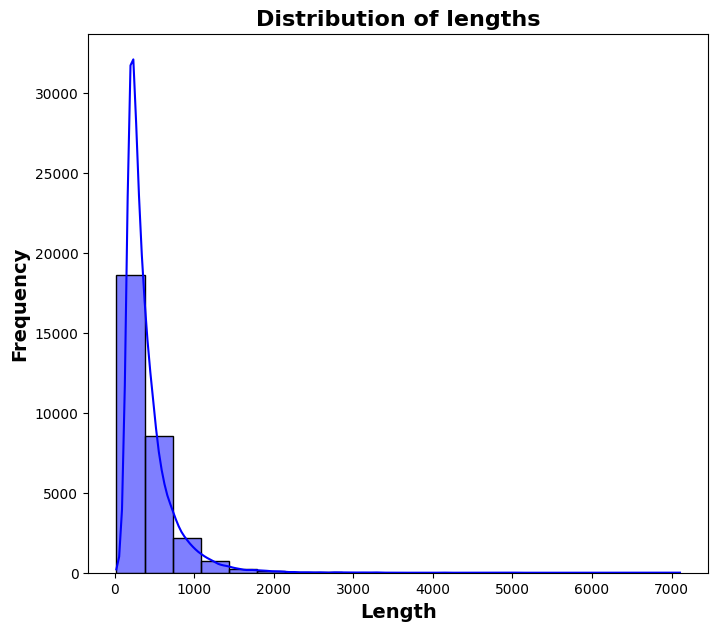

In [ ]:
#calculate length of the cleaned data
train_data['length_Text_cleaning']=train_data['Text_cleaning'].apply(len)
#visualizing the distribution of text lengths
plt.figure(figsize=(8,7))
sns.histplot(data=train_data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length',fontsize=14,fontweight='bold')
plt.ylabel('Frequency',fontsize=14,fontweight='bold')
plt.title('Distribution of lengths',fontsize=16,fontweight='bold')
plt.show()

In [ ]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
#fit and transform the training data
X_train=tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])
#Transfrom the training data
X_test=tfidf_vectorizer.transform(test_data['Text_cleaning'])

In [ ]:
# Split the data into training and validation sets
X = X_train
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred,zero_division=1))

Validation Accuracy: 0.4316688567674113
               precision    recall  f1-score   support

      action        1.00      0.00      0.00       146
       adult        1.00      0.00      0.00        68
   adventure        1.00      0.00      0.00        94
   animation        1.00      0.00      0.00        52
   biography        1.00      0.00      0.00        27
      comedy        0.52      0.02      0.03       801
       crime        1.00      0.00      0.00        56
 documentary        0.52      0.90      0.66      1441
       drama        0.37      0.88      0.52      1502
      family        1.00      0.00      0.00        91
     fantasy        1.00      0.00      0.00        42
   game-show        1.00      0.00      0.00        21
     history        1.00      0.00      0.00        21
      horror        1.00      0.00      0.00       227
       music        1.00      0.00      0.00        74
     musical        1.00      0.00      0.00        27
     mystery        1.00

In [ ]:
# Use the trained model to make predictions on the test data
X_test_predictions = classifier.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions

In [ ]:
# Save the test_data DataFrame with predicted genres to a CSV file
test_data.to_csv('predicted_genres.csv', index=False)

# Display the 'test_data' DataFrame with predicted genres
print(test_data)

       Title                           Genre  \
0          1           Edgar's Lunch (1998)    
1          2       La guerra de papá (1977)    
2          3    Off the Beaten Track (2010)    
3          4         Meu Amigo Hindu (2015)    
4          5              Er nu zhai (1955)    
...      ...                             ...   
31066  31067   "Omotola the Real Me" (2012)    
31067  31068       "Detective Sweet" (2016)    
31068  31069       Swinging Sorority (1975)    
31069  31070                    Frog (2007)    
31070  31071                 Parrish (1961)    

                                             Description  \
0       L.R. Brane loves his life - his car, his apar...   
1       Spain, March 1964: Quico is a very naughty ch...   
2       One year in the life of Albin and his family ...   
3       His father has died, he hasn't spoken with hi...   
4       Before he was known internationally as a mart...   
...                                                  ...   
310